In [ ]:
setwd("/mnt/lareaulab/reliscu/projects/NSF_GRFP/analyses/pseudobulk_test/tasic_2018/mouse_ALM/data")

library(data.table)

source("/mnt/lareaulab/reliscu/code/analyzeSyntheticDatasets/makeSyntheticDatasets_0.51.1.r")

Loading required package: coda

Loading required package: MASS

##
## Markov Chain Monte Carlo Package (MCMCpack)

## Copyright (C) 2003-2025 Andrew D. Martin, Kevin M. Quinn, and Jong Hee Park

##
## Support provided by the U.S. National Science Foundation

## (Grants SES-0350646 and SES-0350613)
##



Here I make pseudobulk samples, where each sample contains a mix of cell types

In [2]:
counts <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_gene_counts.csv", data.table=FALSE)
cell_meta <- fread("/mnt/lareaulab/reliscu/projects/NSF_GRFP/data/scRNA-seq/tasic_2018/ALM/tasic_2018_ALM_STAR_sampleinfo.csv", data.table=FALSE)

In [3]:
all.equal(colnames(counts)[-1], cell_meta$Cell_ID)

[1] TRUE

In [4]:
sort(table(cell_meta$cell_subclass))


        L4       Peri         CR      Meis2        SMC       VLMC   Serpinf1 
         3          4         11         11         55         72         78 
Macrophage       Endo      Oligo        L6b       Sncg      Astro    L2/3 IT 
        85         96         98        145        148        215        325 
     L6 CT      L5 PT      L6 IT         NP      Pvalb      Lamp5        Sst 
       350        368        394        542        896        913       1139 
       Vip      L5 IT 
      1224       2401 

In [ ]:
cell.name = which(colnames(cell_meta) == "Cell_ID")
cell.type = which(colnames(cell_meta) == "cell_subclass")
# kappa <- 25
pcnt.cells <- 20
pcnt.var <- 40

cell_frac <- data.frame(table(cell_meta$cell_subclass) / nrow(cell_meta))
cell_meta$Freq <- cell_frac$Freq[match(cell_meta$cell_subclass, as.character(cell_frac[,1]))]
cell.frac = which(colnames(cell_meta) == "Freq")

In [ ]:
makeSyntheticDatasets(
    expr=counts,
    sampleindex=c(2:ncol(counts)),
    cell.info=cell_meta,
    cell.name=cell.name,
    cell.type=cell.type,
    cell.frac=cell.frac,
    pcnt.cells=pcnt.cells,
    pcnt.var=pcnt.var,
    no.samples=200,
    no.datasets=1,
    with.replacement=TRUE
)

In [ ]:
# makeSyntheticDatasets(
#     expr=counts,
#     sampleindex=c(2:ncol(counts)),
#     cell.info=cell_meta,
#     cell.name=cell.name,
#     cell.type=cell.type,
#     pcnt.cells=pcnt.cells,
#     kappa=kappa,
#     no.samples=200,
#     no.datasets=1,
#     with.replacement=TRUE
# )

In [ ]:
# # Debugging

# expr <- counts
# sampleindex=c(2:ncol(counts))
# cell.info=cell_meta
# cell.name=cell.name
# cell.type=cell.type
# cell.frac=cell.frac
# pcnt.cells=20
# pcnt.var=75
# no.samples=100
# no.datasets=1
# i=1
# with.replacement=TRUE

# ## Check to ensure rows of cell.info and columns of expr are in same order:
# if(all.equal(colnames(expr[,sampleindex]),as.character(cell.info[,cell.name]))!=TRUE){
#     stop("Cell names in expr and cell.info do not match!")
# }

# no.cells=round(length(sampleindex)*pcnt.cells*.01)
# meta=min(sampleindex)-1
# print(paste("Building dataset ",i,"...",sep=""))

# if(is.null(cell.type)){
    
#     dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+1,data=0)
#     dat.legend[,1]=as.character(cell.info[,cell.name])
#     colnames(dat.legend)=c("Cell.name",paste("Sample",c(1:no.samples),sep=""))
#     leg.meta=1
    
# } else {
    
#     dat.legend=matrix(nrow=length(cell.info[,1]),ncol=no.samples+2,data=0)
#     dat.legend[,1]=as.character(cell.info[,cell.name])
#     dat.legend[,2]=as.character(cell.info[,cell.type])
#     colnames(dat.legend)=c("Cell.name","Cell.type",paste("Sample",c(1:no.samples),sep=""))
#     leg.meta=2
    
# }

# dat.synth=matrix(nrow=nrow(expr),ncol=no.samples,data=-88)
# colnames(dat.synth)=paste("Sample",c(1:no.samples),sep="")


[1] "Building dataset 1..."


In [ ]:
# all.ct=unique(as.character(cell.info[,cell.type]))
# sample.vec=c()

# for (ctype in all.ct) {
#     k <- which(all.ct == ctype)
#     rest1=is.element(cell.info[,cell.type],all.ct[k])
#     base.cells=round(no.cells*unique(cell.info[rest1,cell.frac]))
#     # print(paste("base.cells:", base.cells))

#     act.cell.range=c(round(base.cells-ceiling(base.cells*pcnt.var*.01)):round(base.cells+ceiling(base.cells*pcnt.var*.01)))
#     # print(paste("act.cell.range:", min(act.cell.range), "to", max(act.cell.range)))

#     n_sampled <- c()
#     for (j in 1:no.samples) {
#         act.cells=sample(act.cell.range[act.cell.range>=0 & act.cell.range<length(sampleindex)],1)
#         n_sampled=c(n_sampled, act.cells)
#     }
#     sample.vec <- c(sample.vec, sd(n_sampled))

# }


In [ ]:
# library(dplyr)

# df1 <- data.frame(Var1=all.ct, SD=sample.vec)
# df2 <- as.data.frame(table(cell_meta$cell_subclass))

# df <- merge(df1, df2, by="Var1") %>%
#     arrange(Freq)
# df

Var1,SD,Freq
<chr>,<dbl>,<int>
L4,0.7654140,3
Peri,0.8518548,4
CR,1.3631514,11
Meis2,1.4207695,11
SMC,5.6958163,55
VLMC,6.0581275,72
Serpinf1,7.2974328,78
Macrophage,7.2581824,85
Endo,9.4660478,96


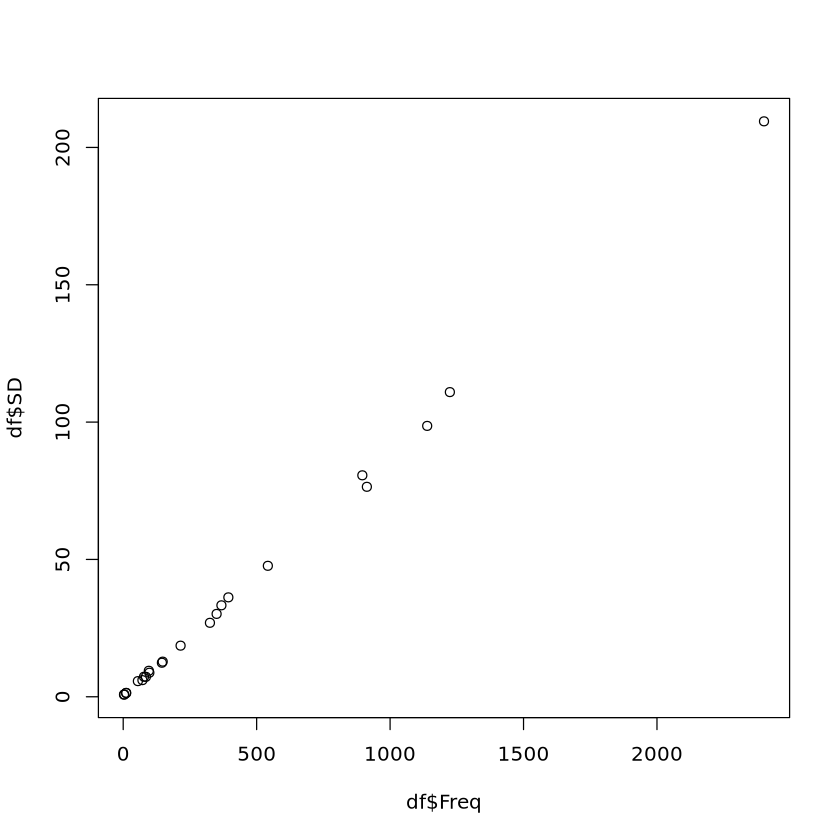

In [ ]:
# plot(df$Freq, df$SD)

In [ ]:
# library(MCMCpack)

# prop_baseline <- table(cell.info[,cell.type]) / nrow(cell_meta)

# for (j in 1:no.samples) {
#     set.seed(j)
    
#     p <- as.numeric(rdirichlet(1, kappa * prop_baseline)) # Target proportion of each cell type; wiggle around baseline proportions is determined by `kappa`
#     p <- p/sum(p)
#     names(p) <- names(prop_baseline)

#     type_vec <- cell_meta[,cell.type]
#     tab <- table(type_vec)
#     w_type <- p[names(tab)] # Sampling weight for each cell based on cell type probabilities
#     per_cell_prob <- w_type[type_vec] / as.numeric(tab[type_vec]) # Convert sampling weights into probabilities 
#     cell_idx <- sample(seq_along(type_vec), size=no.cells, replace=with.replacement, prob=per_cell_prob)

#     dat.synth[,j] <- apply(as.data.frame(expr[,cell_idx + meta]), 1, sum, na.rm=T)
#     dat.legend[cell_idx, j + leg.meta] <- 1
# }
